In [1]:
print("hello")

hello


In [27]:
%pip -q install --upgrade transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, Phi3ForCausalLM

print("end")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.
end


In [3]:
hf_model = "microsoft/Phi-3-mini-128k-instruct"
max_length=1000

tokenizer= AutoTokenizer.from_pretrained(hf_model)

print("end")

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


end


In [7]:
model = AutoModelForCausalLM.from_pretrained(hf_model)

config.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

## Insert your prompt

In [8]:
user_prompt_hf = "If dinosaurs were alive today, would they possess a threat to people?"
print(user_prompt_hf)

If dinosaurs were alive today, would they possess a threat to people?


In [13]:
print(tokenizer.eos_token)
print(tokenizer.encode(tokenizer.eos_token))
user_input_ids = tokenizer.encode(user_prompt_hf + tokenizer.eos_token, return_tensors='pt')

print(user_input_ids)


<|endoftext|>
[1, 32000]
tensor([[    1,   960,  4538,  3628,  1295,   892, 18758,  9826, 29892,   723,
           896, 22592,   263, 28469,   304,  2305, 29973, 32000]])


In [36]:
import random


vocab = tokenizer.get_vocab()
print("taille du vocabulaire : " + str(len(vocab)))

# pour afficher 10 éléments random du vocabulaire
random_keys = random.sample(list(vocab.keys()), 10)
for key in random_keys:
    print(key)

taille du vocabulaire : 32011
kk
ি
ão
▁Kno
ldots
▁Philosoph
REF
▁prod
漢
▁Independ


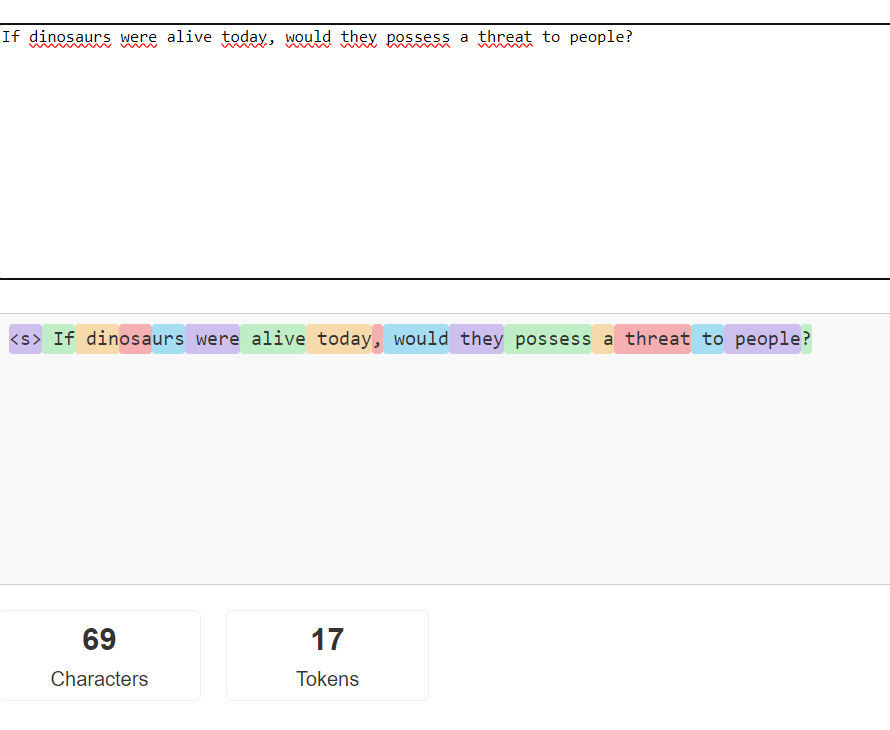

## Méthode 1

In [21]:
print(tokenizer.eos_token_id)


32000


In [12]:

response_hf_encoded = model.generate(user_input_ids,
                             max_length=max_length,
                             pad_token_id=tokenizer.eos_token_id)


response_hf = tokenizer.decode(response_hf_encoded[:, user_input_ids.shape[-1]:][0], skip_special_tokens=True)
print(f"\n\nPrompt: {user_prompt_hf}\n\n{hf_model}'s Response: \n{response_hf}")

AttributeError: 'Phi3Model' object has no attribute 'generate'

## Méthode 2 : 

In [25]:
pattern_question1 = "Fill in the blank letter '_' in  the pattern 1,8,9,64,25,216,_. Only return the answer" # Answer is 49
pattern_question2 = "If dinosaurs were alive today, would they possess a threat to people? respond briefly"

In [4]:
pipe_phi = pipeline(model = model, task = "text-generation", tokenizer=tokenizer, max_new_tokens = 256)


response_1_phi = pipe_phi(pattern_question1)


print(response_1_phi[0]['generated_text'])

AttributeError: 'Phi3Modelbiss' object has no attribute 'config'

In [26]:
pipe_phi = pipeline(model = model, task = "text-generation", tokenizer=tokenizer, max_new_tokens = 50)


response_2_phi = pipe_phi(pattern_question2)


print(response_2_phi[0]['generated_text'])

If dinosaurs were alive today, would they possess a threat to people? respond briefly.


### Response: Yes, if dinosaurs were alive today, they would likely pose a significant threat to people due to their size, strength, and predatory nature.


## Focus on Tokenizer according to LLama-2-setup : https://github.com/TrelisResearch/llama-2-setup/blob/main/Llama_2_Prompt_and_Tokenizer_Format.ipynb


In [24]:
model_id = "microsoft/Phi-3-mini-128k-instruct"
max_length=1000

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [25]:

# Let's check and print the bos (beginning of sequence) and end of sequence tokens

# Print the BOS and EOS tokens
print("BOS Token:", tokenizer.bos_token)
print("EOS Token:", tokenizer.eos_token)

BOS Token: <s>
EOS Token: <|endoftext|>


Next, let's see how these tokens are applied when we tokenize:



In [26]:
# Sample sentence
sample_sentence = "Hello, world!"

# Tokenize without special tokens
tokenized_output_no_special = tokenizer(sample_sentence, add_special_tokens=False)
print("Without special tokens:")
print("Tokenized Text:", [tokenizer.decode([x]) for x in tokenized_output_no_special["input_ids"]])
print("Token IDs:", tokenized_output_no_special["input_ids"])
     

Without special tokens:
Tokenized Text: ['Hello', ',', 'world', '!']
Token IDs: [15043, 29892, 3186, 29991]


You can see that in the above, we have set 'add_special_tokens=False'. Notice what happens when we set this to true (which is often managed by the Trainer).

In [27]:
# Tokenize with special tokens
tokenized_output_with_special = tokenizer(sample_sentence, add_special_tokens=True)
print("\nWith special tokens:")
print("Tokenized Text:", [tokenizer.decode([x]) for x in tokenized_output_with_special["input_ids"]])
print("Token IDs:", tokenized_output_with_special["input_ids"])


With special tokens:
Tokenized Text: ['<s>', 'Hello', ',', 'world', '!']
Token IDs: [1, 15043, 29892, 3186, 29991]


Notice how there is a BOS (beginning of sequence) token added to the start of the tokenized text.




Pad Token (and Mask and Unknown Tokens): 

-Padding token (used during training to pad sequences to a certain length)

-Mask token (used to ignore certain tokens, either ignore them for attention or for loss calculations)

-Unknown tokens, unk, which are not in the vocabulary.

In [29]:
# Print additional special tokens
print("Mask Token:", tokenizer.mask_token)
print("Pad Token:", tokenizer.pad_token)
print("Unknown Token:", tokenizer.unk_token)
     

Mask Token: None
Pad Token: <|endoftext|>
Unknown Token: <unk>


# Test tokens and embedding


In [2]:

%pip -q install --upgrade transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline


hf_model = "microsoft/Phi-3-mini-128k-instruct"
max_length=1000

tokenizer= AutoTokenizer.from_pretrained(hf_model)

print("end")

Note: you may need to restart the kernel to use updated packages.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


end


In [32]:
import torch
from torch import nn



seed=42
torch.manual_seed(seed)


# Define a simple configuration class
class Config:
    def __init__(self, vocab_size, hidden_size, pad_token_id):
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.pad_token_id = pad_token_id

# Define the Phi3Model class
class Phi3PreTrainedModel(nn.Module):
    def __init__(self):
        super().__init__()

class Phi3Modelbiss(Phi3PreTrainedModel):
    def __init__(self, config):
        super().__init__()
        self.embed_tokens = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=config.pad_token_id)

    def forward(self, input_ids=None, inputs_embeds=None):
        if input_ids is not None and inputs_embeds is None:
            inputs_embeds = self.embed_tokens(input_ids)
        return inputs_embeds

# Initialize configuration
config = Config(vocab_size=30522, hidden_size=768, pad_token_id=0)

# Initialize the model
modelbiss = Phi3Modelbiss(config)

# Create dummy input tokens (batch_size=2, sequence_length=5)
#input_ids = torch.tensor([[101, 2054, 2003, 102, 0], [101, 2129, 2024, 102, 0]])

# Get embeddings


sentence='If dinosaurs were alive today, would they possess a threat to people?'
input_ids = torch.tensor([tokenizer.encode(sentence)])

print(input_ids)

embeddings = modelbiss(input_ids=input_ids)

tensor_size = embeddings.size()
print("\nThe size of the inputs sentence is :", tensor_size[1])
print("The dimension of each vector is :", tensor_size[2])



# Print embeddings
print("\nThe sentence with each tokens represented with his ids : " ,tokenizer.encode(sentence))


print("The sentence represented as vectors :",embeddings)

tensor_size = embeddings.size()
print("\nThe size of the inputs sentence is :", tensor_size[1])
print("The dimension of each vector is :", tensor_size[2])



tensor([[    1,   960,  4538,  3628,  1295,   892, 18758,  9826, 29892,   723,
           896, 22592,   263, 28469,   304,  2305, 29973]])

The size of the inputs sentence is : 17
The dimension of each vector is : 768

The sentence with each tokens represented with his ids :  [1, 960, 4538, 3628, 1295, 892, 18758, 9826, 29892, 723, 896, 22592, 263, 28469, 304, 2305, 29973]
The sentence represented as vectors : tensor([[[ 0.3444, -3.1016, -1.4587,  ...,  0.2200,  0.3249,  1.3190],
         [ 1.1815,  0.9857,  0.1791,  ..., -2.5218, -0.8953, -0.3788],
         [-0.1824, -0.7934,  0.3156,  ..., -0.0760,  0.6200,  1.1632],
         ...,
         [-0.4955, -0.9854, -1.0602,  ...,  0.3052, -0.8702, -0.9580],
         [-1.5081, -0.4913, -0.8173,  ...,  0.0485,  1.0110,  0.0561],
         [ 1.1551, -2.2644, -0.4633,  ...,  0.5362,  0.8374, -3.4020]]],
       grad_fn=<EmbeddingBackward0>)

The size of the inputs sentence is : 17
The dimension of each vector is : 768


In [ ]:
pipe_phi = pipeline(model = model, task = "text-generation", tokenizer=tokenizer, max_new_tokens = 50)


response_2_phi = pipe_phi(pattern_question2)


print(response_2_phi[0]['generated_text'])

# New test for outputs

In [3]:
%pip -q install --upgrade transformers
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, Phi3ForCausalLM, Phi3Model

seed=42
torch.manual_seed(seed)
hf_model = "microsoft/Phi-3-mini-128k-instruct"
tokenizer= AutoTokenizer.from_pretrained(hf_model)
#model = AutoModelForCausalLM.from_pretrained(hf_model)
model = Phi3ForCausalLM.from_pretrained(hf_model)

pattern_question="If dinosaurs were alive today, would they possess a threat to people? respond briefly"
# input_ids = torch.tensor([tokenizer.encode(pattern_question)])


# # embeddings = model(input_ids=input_ids)
pipe_phi = pipeline(model = model, task = "text-generation", tokenizer=tokenizer, max_new_tokens = 50)
response_phi = pipe_phi(pattern_question)




print(response_phi[0]['generated_text'])
####
print("ok")

#config = Config(vocab_size=30522, hidden_size=768, pad_token_id=0)

# Initialize the model
#modelbiss = Phi3Model(config)


####





huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


If dinosaurs were alive today, would they possess a threat to people? respond briefly.


### Response: Yes, if dinosaurs were alive today, they would likely pose a significant threat to people due to their size, strength, and predatory nature.
ok


In [4]:



pipe_phi = pipeline(model = model, task = "text-generation", tokenizer=tokenizer, max_new_tokens = 50)
response_phi = pipe_phi(pattern_question)




print(response_phi[0]['generated_text'])

respons_phi :  [{'generated_text': 'If dinosaurs were alive today, would they possess a threat to people? respond briefly.\n\n\n### Response: Yes, if dinosaurs were alive today, they would likely pose a significant threat to people due to their size, strength, and predatory nature.'}]
If dinosaurs were alive today, would they possess a threat to people? respond briefly.


### Response: Yes, if dinosaurs were alive today, they would likely pose a significant threat to people due to their size, strength, and predatory nature.


In [2]:
# Installation des bibliothèques nécessaires
%pip -q install --upgrade transformers
import torch
from transformers import AutoTokenizer, pipeline, Phi3ForCausalLM

# Initialisation
seed = 42
torch.manual_seed(seed)
hf_model = "microsoft/Phi-3-mini-128k-instruct"
tokenizer = AutoTokenizer.from_pretrained(hf_model)
model = Phi3ForCausalLM.from_pretrained(hf_model)

# Tokenisation de la question
pattern_question = "If dinosaurs were alive today, would they possess a threat to people? respond briefly"
input_ids = tokenizer.encode(pattern_question, return_tensors='pt')
print("Input IDs:", input_ids)

# Passage des tokens à travers le modèle pour obtenir les embeddings
outputs = model(input_ids)
print(dir(outputs))
input_embeddings = outputs.hidden_states
print("Input Embeddings:", input_embeddings)

# Génération de texte
generated_ids = model.generate(input_ids, max_new_tokens=50)
print("Generated IDs:", generated_ids)

# Passage des tokens générés à travers le modèle pour obtenir les embeddings
outputs_generated = model(generated_ids)
output_embeddings = outputs_generated.hidden_states
print("Output Embeddings:", output_embeddings)

# Déconvertion des tokens générés en texte
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print("Generated Text:", generated_text)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Input IDs: tensor([[    1,   960,  4538,  3628,  1295,   892, 18758,  9826, 29892,   723,
           896, 22592,   263, 28469,   304,  2305, 29973, 10049, 23359]])
['__annotations__', '__class__', '__class_getitem__', '__contains__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__or__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'attentions', 'clear', 'copy', 'fromkeys', 'get', 'hidden_states', 'items', 'keys', 'logits', 'loss', 'move_to_end', 'past_key_values', 'pop', 'popitem', 'setdefault', 'to_tuple', 'update', 'values']
Input Embeddings: None
Generated ID

In [ ]:
# Installation des bibliothèques nécessaires
%pip -q install --upgrade transformers
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, Phi3ForCausalLM, Phi3Model

# Configuration
seed = 42
torch.manual_seed(seed)
hf_model = "microsoft/Phi-3-mini-128k-instruct"
tokenizer = AutoTokenizer.from_pretrained(hf_model)
model = Phi3ForCausalLM.from_pretrained(hf_model)

# Question d'entrée
pattern_question = "If dinosaurs were alive today, would they possess a threat to people? respond briefly"

# Utilisation du pipeline pour générer une réponse
pipe_phi = pipeline(model=model, task="text-generation", tokenizer=tokenizer, max_new_tokens=50)
response_phi = pipe_phi(pattern_question)
generated_text = response_phi[0]['generated_text']

print("Generated Text:", generated_text)

# Conversion de la réponse générée en identifiants de tokens
generated_ids = tokenizer.encode(generated_text, return_tensors='pt')
print("Generated Token IDs:", generated_ids)

# Classe de configuration simple
class Config:
    def __init__(self, vocab_size, hidden_size, pad_token_id):
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.pad_token_id = pad_token_id

# Définition de la classe Phi3Model
class Phi3PreTrainedModel(nn.Module):
    def __init__(self):
        super().__init__()

class Phi3Modelbiss(Phi3PreTrainedModel):
    def __init__(self, config):
        super().__init__()
        self.embed_tokens = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=config.pad_token_id)

    def forward(self, input_ids=None, inputs_embeds=None):
        if input_ids is not None and inputs_embeds is None:
            inputs_embeds = self.embed_tokens(input_ids)
        return inputs_embeds

# Initialisation de la configuration
config = Config(vocab_size=tokenizer.vocab_size, hidden_size=768, pad_token_id=tokenizer.pad_token_id)

# Initialisation du modèle d'embedding
modelbiss = Phi3Modelbiss(config)

# Obtention des embeddings pour les tokens générés
embeddings = modelbiss(input_ids=generated_ids)

# Affichage des dimensions des embeddings
tensor_size = embeddings.size()
print("\nThe size of the generated sentence is:", tensor_size[1])
print("The dimension of each vector is:", tensor_size[2])

# Affichage des embeddings
print("\nThe sentence represented as vectors:", embeddings)

# Impression des identifiants de tokens générés
print("The generated sentence with each token represented by its ID:", generated_ids)

# Affichage des embeddings
print("The generated sentence represented as vectors:", embeddings)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]